# Simple Hopfield Network example

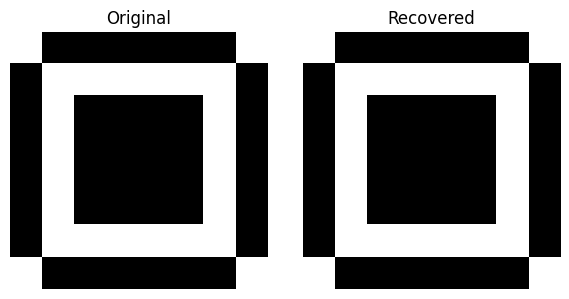

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray

class HopfieldNetwork:
    def __init__(self, num_neurons: int):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons), dtype=int)

    def train(self, patterns: list[NDArray[np.int64]]):
        for p in patterns:
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern: NDArray[np.int64], steps: int=1000):
        s = pattern.copy()
        for _ in range(steps):
            i = np.random.randint(0, self.num_neurons)
            net_input = np.dot(self.weights[i], s)
            s[i] = 1 if net_input >= 0 else -1
        return s

# Define the 8x8 binary image (0/1) for digit "8"
binary_image: NDArray[np.int64] = np.array([
    [0,1,1,1,1,1,1,0],
    [1,0,0,0,0,0,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,0,0,0,0,0,1],
    [0,1,1,1,1,1,1,0]
])

# Convert 0/1 to -1/+1 and flatten
pattern: NDArray[np.int64] = np.where(binary_image.flatten() == 1, 1, -1)

# Train Hopfield network
network = HopfieldNetwork(num_neurons=64)
network.train([pattern])

# Recall from the exact pattern
recovered: NDArray[np.int64] = network.recall(pattern)

# Reshape for visualization
recovered_image: NDArray[np.int64] = np.where(recovered.reshape(8, 8) == 1, 1, 0)

# Plot original and recovered images
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(binary_image, cmap='gray_r')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(recovered_image, cmap='gray_r')
axes[1].set_title('Recovered')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [2]:
print(network.weights)

[[ 0 -1 -1 ... -1 -1  1]
 [-1  0  1 ...  1  1 -1]
 [-1  1  0 ...  1  1 -1]
 ...
 [-1  1  1 ...  0  1 -1]
 [-1  1  1 ...  1  0 -1]
 [ 1 -1 -1 ... -1 -1  0]]


---

# Check if the weights is symmetric

In [ ]:
from numpy.typing import NDArray

def is_symmetric(matrix: NDArray[np.int64]):
    """
    Check if a square matrix is symmetric.
    
    Args:
    matrix (numpy.ndarray): A 2D NumPy array representing the matrix.
    
    Returns:
    bool: True if the matrix is symmetric, False otherwise.
    """
    # Check if the matrix is square
    assert len(matrix.shape) == 2 and matrix.shape[0] == matrix.shape[1], "The input matrix must be square."
    
    # Compare the matrix with its transpose
    return np.allclose(matrix, matrix.T)

# Example usage
matrix = np.array([
    [1, 2, 3],
    [2, 4, 5],
    [3, 5, 6],
])
print(is_symmetric(matrix))  # True

matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
print(is_symmetric(matrix))  # False

print(is_symmetric(network.weights)) # True

True
False
True


---

# References
- [ChatGPT Conversation](https://chatgpt.com/share/681ffb7c-3ccc-8010-9b41-d0ee06ea8e12)